# Augmented Data Comparison

In this notebook, different ways to compare the quality of augmented time series are explored.

## 0 Imports and static variables

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch

# own classes
from sklearn.preprocessing import MinMaxScaler
from utilities import load_sequential_time_series, reconstruct_sequential_data, load_complete_time_series, slice_years, train_test_split, extract_features_and_target, split_data_into_sequences, Scaler

In [2]:
DATA_FOLDER = Path("./data")
SYNTHETIC_DATA_FOLDER = DATA_FOLDER / "synthetic"
REAL_DATA_FOLDER = DATA_FOLDER / "real"

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 1 Loading data

In [4]:
aapl_time_gan = load_sequential_time_series(SYNTHETIC_DATA_FOLDER / "AAPL_complete_TimeGAN_10953_25_6.csv", (10953, 25, 6))

In [5]:
aapl_real = load_complete_time_series(REAL_DATA_FOLDER / "AAPL_complete.csv")

In [6]:
aapl_real_no_date = aapl_real.drop(columns=["Date"])
aapl_real_numpy = aapl_real_no_date.to_numpy()

In [7]:
aapl_train, aapl_test = train_test_split(aapl_real_numpy, 0.8)

In [8]:
aapl_scaler = Scaler(aapl_train)

In [9]:
aapl_train_scaled = aapl_scaler.scale_data(aapl_train)
aapl_test_scaled = aapl_scaler.scale_data(aapl_test)

In [15]:
aapl_test_scaled[-10:]

array([[6.44794077, 6.34971791, 6.51580375, 6.33037118, 6.44794077,
        0.01262905],
       [6.37710117, 6.47532403, 6.50627935, 6.33870521, 6.37710117,
        0.01077165],
       [6.23988694, 6.36638596, 6.3756133 , 6.21518281, 6.23988694,
        0.01161098],
       [6.17470309, 6.2610199 , 6.30566661, 6.16339248, 6.17470309,
        0.03320309],
       [6.19404983, 6.18154881, 6.32977577, 6.1479148 , 6.19404983,
        0.01087724],
       [6.22173103, 6.2241118 , 6.2904869 , 6.20803919, 6.22173103,
        0.00764169],
       [6.34614632, 6.29405849, 6.39406716, 6.26846101, 6.34614632,
        0.00892164],
       [6.37144631, 6.38900723, 6.42026002, 6.31935848, 6.37144631,
        0.00670643],
       [6.26786561, 6.42115292, 6.43008235, 6.25834121, 6.26786561,
        0.01112189],
       [6.45032199, 6.31161941, 6.47294284, 6.30655951, 6.45032199,
        0.00812745]])

In [10]:
aapl_test_close_scaled = aapl_test_scaled[:, 0].reshape(-1, 1)

In [11]:
aapl_close_inverse_scaled = aapl_scaler.inverse_scale_data(aapl_test_close_scaled, feature_type='price')

In [13]:
aapl_close_inverse_scaled[-5:]

array([209.070007, 213.25    , 214.100006, 210.619995, 216.75    ])

## 2 Plot Data

In [ ]:
aapl_time_gan.shape

(10953, 25, 6)

In [ ]:
aapl_time_gan = reconstruct_sequential_data(aapl_time_gan)

In [ ]:
aapl_time_gan = pd.DataFrame(aapl_time_gan, columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
aapl_time_gan['Date'] = aapl_real['Date']

In [ ]:
aapl_time_gan.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.010008,0.009547,0.009773,0.009365,0.008096,0.048475,1980-12-12
1,0.001182,0.001489,0.001230,0.001260,0.001274,0.049914,1980-12-15
2,0.000775,0.001035,0.000885,0.000808,0.000758,0.013094,1980-12-16
3,0.001211,0.001546,0.001282,0.001280,0.001324,0.047958,1980-12-17
4,0.001039,0.001293,0.001090,0.001114,0.001070,0.034014,1980-12-18


In [ ]:
aapl_time_gan.describe()

,Open,High,Low,Close,Adj Close,Volume,Date
count,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953
mean,0.098962,0.099067,0.099813,0.099294,0.096570,0.038669,2002-08-24 22:51:30.221857024
min,0.000544,0.000614,0.000556,0.000529,0.000350,0.001416,1980-12-12 00:00:00
25%,0.000798,0.000947,0.000823,0.000848,0.000700,0.013213,1991-10-11 00:00:00
50%,0.001784,0.002193,0.001966,0.001770,0.001930,0.021600,2002-08-21 00:00:00
75%,0.025788,0.025160,0.026641,0.025294,0.022422,0.049842,2013-07-09 00:00:00
max,0.678322,0.679088,0.685720,0.683188,0.674904,0.210891,2024-05-23 00:00:00
std,0.200831,0.200953,0.202579,0.201855,0.198524,0.039254,NaN


In [ ]:
aapl_time_gan.shape

(10953, 7)

In [ ]:
aapl_time_gan = slice_years(aapl_time_gan, ['2020', '2020'])

In [ ]:
aapl_time_gan.shape

(253, 7)

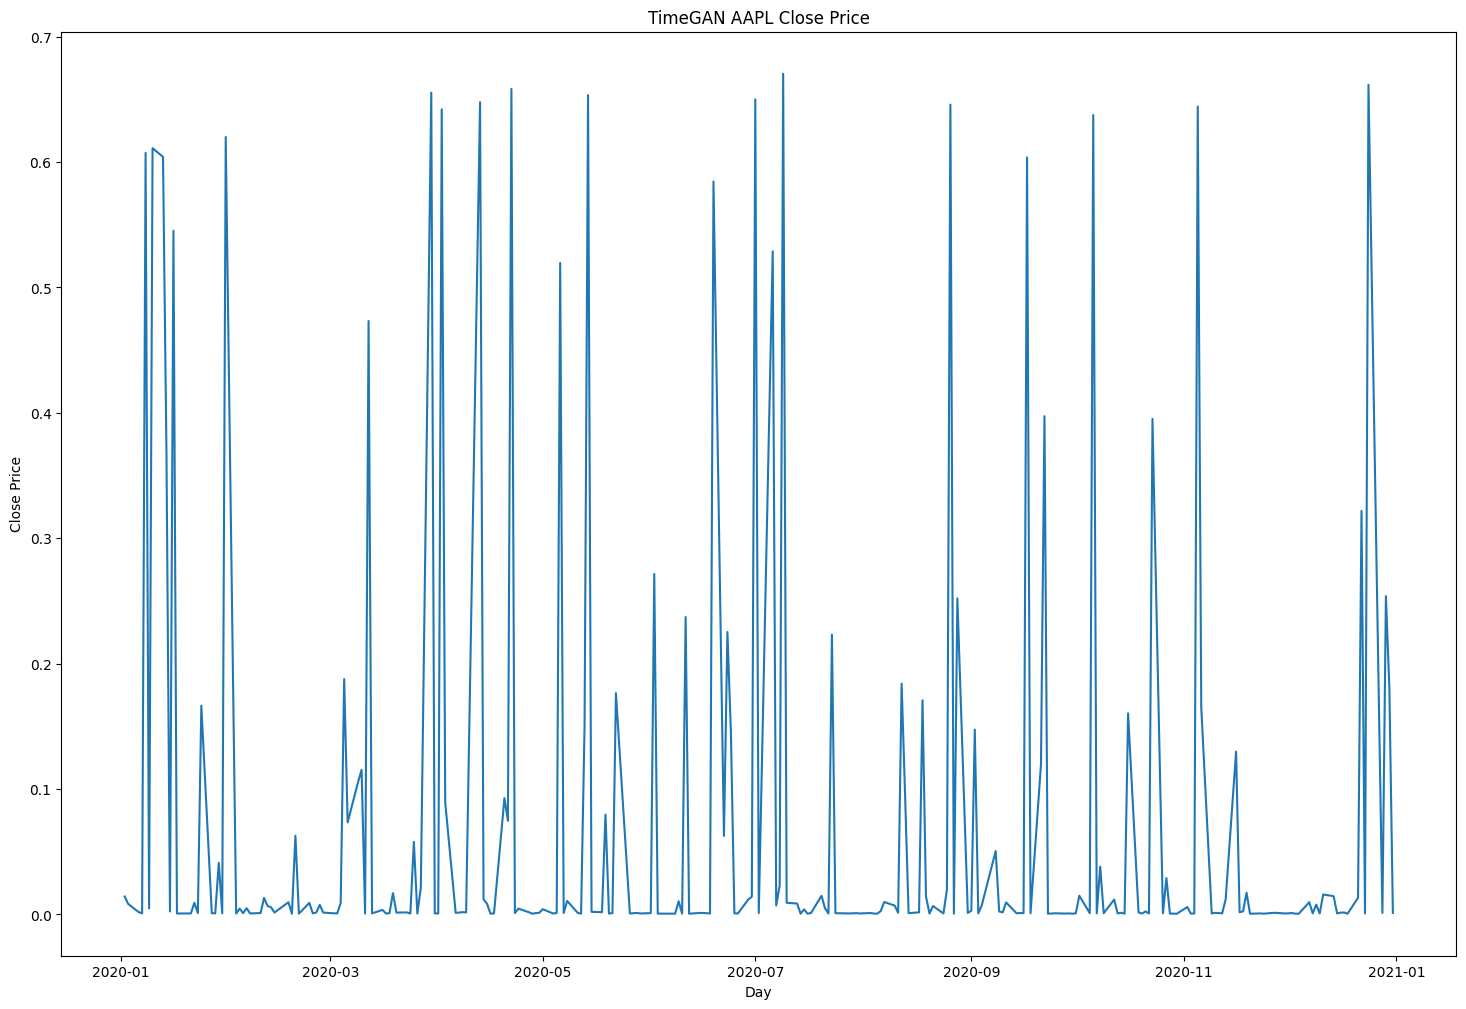

In [ ]:
plt.figure(figsize=(18, 12))
plt.plot(aapl_time_gan['Date'], aapl_time_gan["Close"], label="Close")
plt.title("TimeGAN AAPL Close Price")
plt.xlabel("Day")
plt.ylabel("Close Price")
plt.show()

In [ ]:
plot_time_series_attribute(df=aapl, title="AAPL")

NameError: name 'plot_time_series_attribute' is not defined

In [ ]:
# get only data between 2020-2024
aapl_22_23 = slice_years(df=aapl, years=["2022", "2023"])

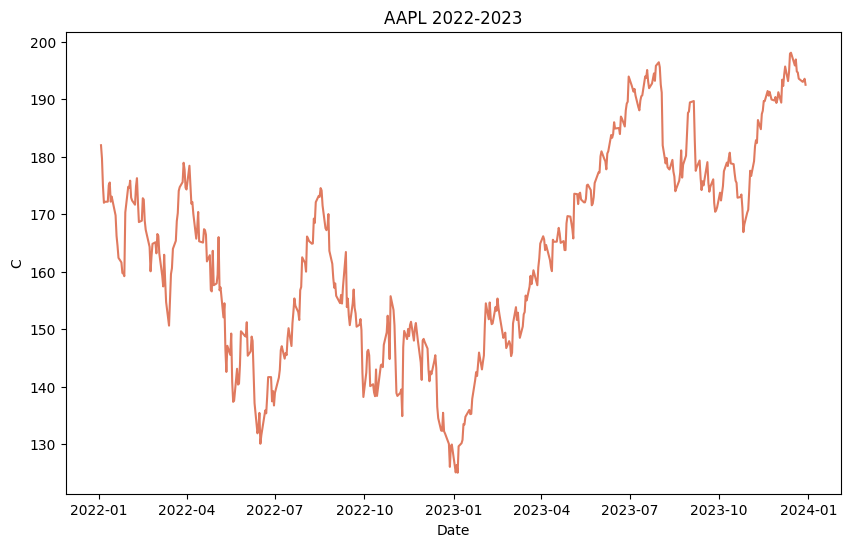

In [ ]:
plot_time_series_attribute(aapl_22_23, "AAPL 2022-2023")

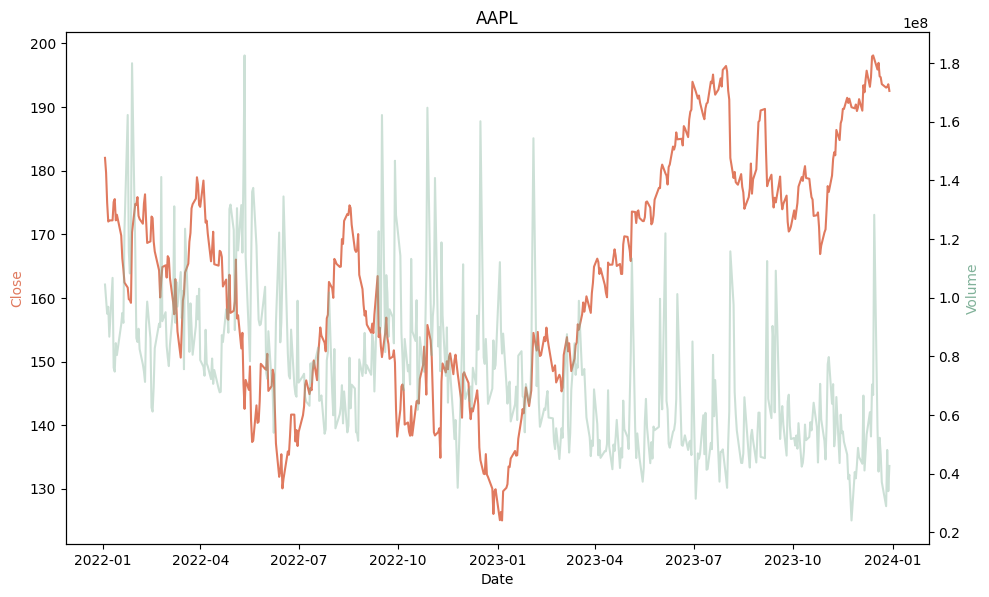

In [ ]:
plot_multiple_time_series_attributes(aapl_22_23, "AAPL")

## 3 Brownian Motion

In [ ]:
aapl_syn = brownian_motion(aapl_22_23, ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
aapl_syn.head()

Augmenting the following columns with brownian motion: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']...


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481094,1.044879e+08
1,2022-01-04,172.620023,180.388536,176.211397,193.085058,172.600136,0.000000e+00
2,2022-01-05,167.867580,176.796036,179.046459,196.184902,188.092348,4.537602e+14
3,2022-01-06,171.495009,174.516889,179.089305,187.578594,195.036392,9.066193e+14
4,2022-01-07,173.196107,177.556243,175.616598,191.393298,191.480458,1.432839e+15


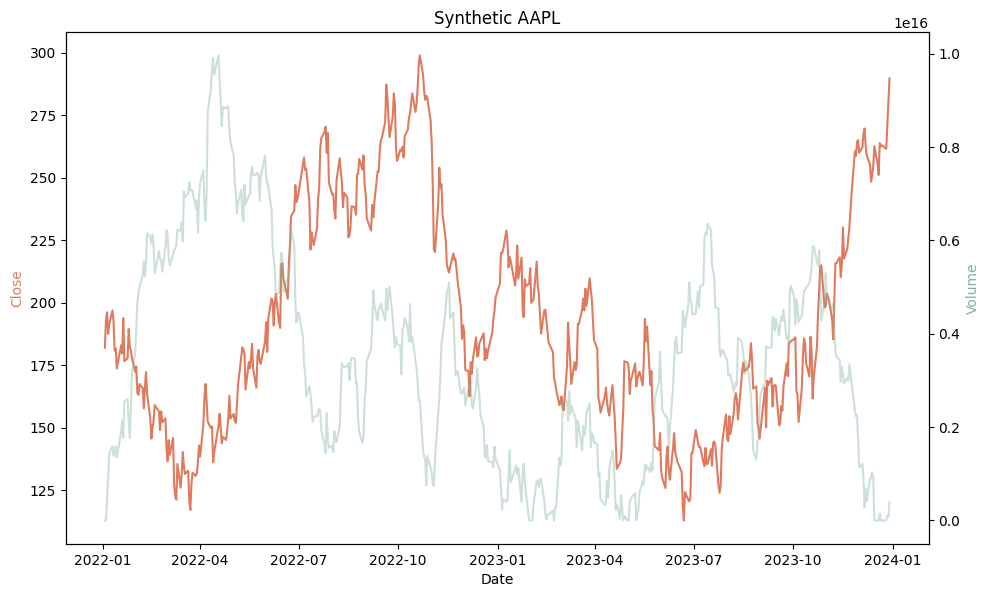

In [ ]:
plot_multiple_time_series_attributes(aapl_syn, title="Synthetic AAPL")

In [ ]:
aapl_syn.to_csv(SYNTHETIC_DATA_FOLDER / 'AAPL_22_23_syn.csv', index=False)

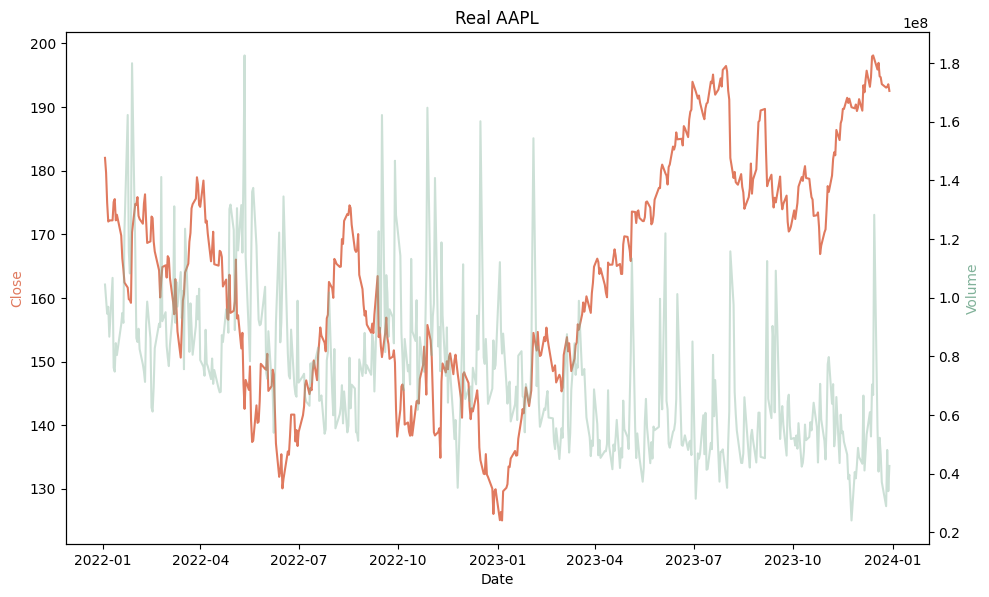

In [ ]:
plot_multiple_time_series_attributes(aapl_22_23, title="Real AAPL")

## MAE and MSE Loss experiments

In [ ]:
# real = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# A = np.array([1, 2, 3, 4, 5, 6, 8, 9, 10, 12])
# B = np.array([1, 2.1, 3.1, 4.1, 5.1, 6, 7, 8, 9, 10])

# # scale
# scaler = MinMaxScaler(feature_range=(0, 1))
# real_scaled = scaler.fit_transform(real.reshape(-1, 1))
# A_scaled = scaler.fit_transform(A.reshape(-1, 1))
# B_scaled = scaler.fit_transform(B.reshape(-1, 1))

# loss_MSE = torch.nn.MSELoss()
# loss_MAE = torch.nn.L1Loss()

# MSE_A = loss_MSE(torch.tensor(real_scaled, dtype=torch.float32), torch.tensor(A_scaled, dtype=torch.float32))
# MAE_A = loss_MAE(torch.tensor(real, dtype=torch.float32), torch.tensor(A, dtype=torch.float32))
# MSE_B = loss_MSE(torch.tensor(real_scaled, dtype=torch.float32), torch.tensor(B_scaled, dtype=torch.float32))
# MAE_B = loss_MAE(torch.tensor(real, dtype=torch.float32), torch.tensor(B, dtype=torch.float32))

# print(f'MSE_A: {MSE_A}\n')
# print(f'MAE_A: {MAE_A}\n')
# print(f'MSE_B: {MSE_B}\n')
# print(f'MAE_B: {MAE_B}\n')

MSE_A: 0.0030915215611457825

MAE_A: 0.5

MSE_B: 4.9382710130885243e-05

MAE_B: 0.039999961853027344

